In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinv,null_space
from RateDistortion import *
from ProgressBar import ProgressBar

In [2]:
# parameters
R = np.array([[2,0.5],[0.5,2]])
px = np.array([0.5,0.5])

s = np.array([[7/9,2/9],[2/9,7/9]])
s2 = np.array([[2/3,1/3],[1/3,2/3]])
s3 = np.array([[1,0],[0,1]])
s4 = np.array([[0.5,0.5]])

In [3]:
# generate curves for the first subplot

# get the rate-distortion function
d = getFullDistortionFunction(R,s)
result = getRD(px,d,numPoints=200)

d2 = getFullDistortionFunction(R,s2)
result2 = getRD(px,d2,numPoints=200)

# line for the bound
dmin = np.min([np.min(result['Dmax_v']),np.min(result2['Dmax_v'])])
dmax = np.max([np.max(result['Dmax_v']),np.max(result2['Dmax_v'])])

Qinv = np.diag(inv(R) @ np.ones(np.shape(R)[0]))
Q = inv(Qinv)

L = getAvgLambdaStar(Q,px)
D_v = np.array([dmin,dmax])
B_v = hx(px) - D_v - L

# point of equality
T = getT(R,s)
#T = np.array([[Tv[0],Tv[2]],[Tv[1],Tv[3]]])
py = px @ inv(T)
pxy = np.diag(py) @ T
Dstar = np.sum(pxy * d)
Rstar = hx(px) - Dstar - L

T = getT(R,s2)
#T = np.array([[Tv[0],Tv[2]],[Tv[1],Tv[3]]])
py = px @ inv(T)
pxy = np.diag(py) @ T
Dstar2 = np.sum(pxy * d2)
Rstar2 = hx(px) - Dstar2 - L

In [4]:
# generate curves for second subplot

sv = np.linspace(0.02,0.5,num=24,endpoint=False)
pb = ProgressBar(len(sv),40)

Dstar_v = np.zeros(len(sv))
Rstar_v = np.zeros(len(sv))
i_v = 0

for s0 in sv:
  S = np.array([[1-s0,s0],[s0,1-s0]])
  d = getFullDistortionFunction(R,S)
  if s0 == sv[0]:
    results = [getRD(px,d)]
  else:
    results.append(getRD(px,d))
  
  # point of equality
  T = getT(R,S)
  #T = np.array([[Tv[0],Tv[2]],[Tv[1],Tv[3]]])
  py = px @ inv(T)
  pxy = np.diag(py) @ T
  Dstar_v[i_v] = np.sum(pxy * d)
  Rstar_v[i_v] = hx(px) - Dstar_v[i_v] - L
  
  i_v += 1
  
  pb.iterate()
  
pb.hide()

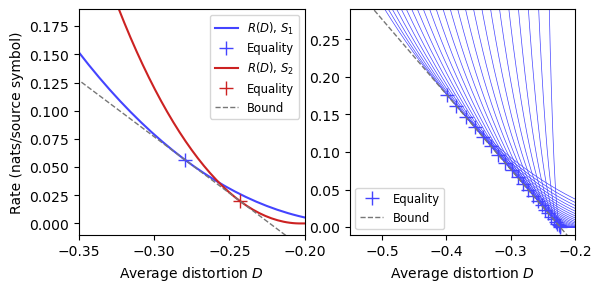

In [6]:
# generate the plot

fig,ax = plt.subplots(1,2)

# first subplot

# plots R(D) and corresponding point of equality
ax[0].plot(result['Dmax_v'],result['r_v'],
         color='#4444ff',linestyle='-',markersize=3,label='$R(D)$, $S_1$')
ax[0].plot([Dstar],[Rstar],marker='+',markersize=10,
         color='#4444ff',linestyle='None',label='Equality')

ax[0].plot(result2['Dmax_v'],result2['r_v'],
         color='#cc2222',linestyle='-',markersize=3,label='$R(D)$, $S_2$')
ax[0].plot([Dstar2],[Rstar2],marker='+',markersize=10,
         color='#cc2222',linestyle='None',label='Equality')


# plots the bound line
ax[0].plot(D_v,B_v,color='#777777',linewidth=1,linestyle='--',label='Bound')

ax[0].axis([-0.35,-0.2,-0.01,0.19])
ax[0].set_xlabel('Average distortion $D$')
ax[0].set_ylabel('Rate (nats/source symbol)')
ax[0].legend(fontsize='small')
#ax[0].set_xticks([-0.35,-0.3,-0.25,-0.2])
ax[0].set_aspect(1/ax[0].get_data_ratio())

# second subplot

for i in range(len(sv)):
  ax[1].plot(results[i]['Dmax_v'],results[i]['r_v'],color='#4444ff',linewidth=0.5)
  

ax[1].plot(Dstar_v,Rstar_v,linestyle='',marker='+',color='#4444ff',markersize=10,label='Equality')

  
# plots the bound line
D_v = np.array([-0.55,-0.2])
B_v = hx(px) - D_v - L
ax[1].plot(D_v,B_v,color='#777777',linewidth=1,linestyle='--',label='Bound')



ax[1].axis([-0.55,-0.2,-0.01,0.29])
ax[1].set_xlabel('Average distortion $D$')
#ax[1].set_ylabel('Rate (nats/source symbol)')
ax[1].legend(fontsize='small')
#plt.xticks([-0.35,-0.3,-0.25,-0.2])
ax[1].set_aspect(1/ax[1].get_data_ratio())

plt.savefig('Figure2.pdf',bbox_inches='tight')